<a href="https://colab.research.google.com/github/Fatemehrshd/DataMining/blob/main/PCA_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 803 kB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

import category_encoders as ce

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import tree

from sklearn.model_selection import cross_val_score

In [7]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")

In [8]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
#y = df.select_dtypes(include=['object']).copy()
#y.head()

In [10]:
train_df = pd.DataFrame({'RiskLevel':['high risk','mid risk', 'low risk']})

In [11]:
encoder = ce.OrdinalEncoder(cols=['Risklevel'],return_df=True,
                           mapping=[{'col':'Risklevel',
'mapping':{'None':0,'high risk':1,'high risk':2,'high risk':3}}])

In [12]:
train_df

,RiskLevel
0,high risk
1,mid risk
2,low risk


In [13]:
y = df["RiskLevel"]
X = df.drop("RiskLevel",axis=1)

y.head()

0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: RiskLevel, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
rfm = RandomForestClassifier()

In [16]:
y_train.shape

(709,)

In [17]:
rfm.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
rfm_pred = rfm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


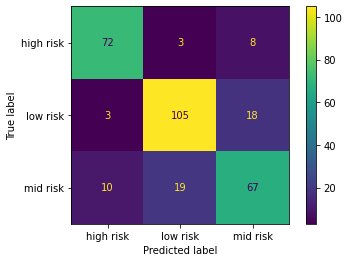

In [19]:
plot_confusion_matrix(rfm, X_test, y_test)

In [20]:
print(classification_report(y_test, rfm_pred))

              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        83
    low risk       0.83      0.83      0.83       126
    mid risk       0.72      0.70      0.71        96

    accuracy                           0.80       305
   macro avg       0.80      0.80      0.80       305
weighted avg       0.80      0.80      0.80       305



In [21]:
rfm_acc = accuracy_score(y_test, rfm_pred)

In [22]:
scores = []
scores.append(np.mean(cross_val_score(rfm, X_train, y_train, cv=5)))
#scores = cross_val_score(rfm, X_train, y_train, cv=5)

In [23]:
accuracy_list = []
accuracy_list.append(rfm_acc * 100)

In [24]:
##################################

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test  = scaler.transform(X_test)

In [27]:
y_train.shape

(709,)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [29]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
knn_pred = knn.predict(scaled_X_test)

In [31]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

   high risk       0.95      0.73      0.83        83
    low risk       0.78      0.79      0.78       126
    mid risk       0.64      0.75      0.69        96

    accuracy                           0.76       305
   macro avg       0.79      0.76      0.77       305
weighted avg       0.78      0.76      0.77       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


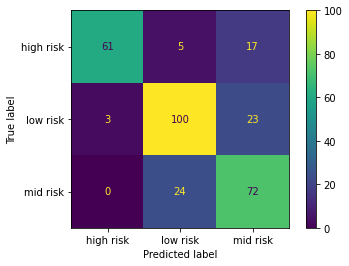

In [32]:
plot_confusion_matrix(knn, scaled_X_test, y_test)

In [33]:
knn_acc = accuracy_score(y_test, knn_pred)

In [34]:
scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
#scores = cross_val_score(knn, X_train, y_train, cv=5)

In [35]:
accuracy_list.append(knn_acc * 100)

In [36]:
#####################################33

In [37]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(scaled_X_train, y_train)
dt_pred = dt.predict(scaled_X_test)

In [38]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

   high risk       0.76      0.88      0.82        83
    low risk       0.85      0.79      0.82       126
    mid risk       0.73      0.70      0.71        96

    accuracy                           0.79       305
   macro avg       0.78      0.79      0.78       305
weighted avg       0.79      0.79      0.79       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


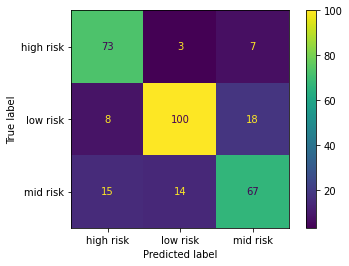

In [39]:
plot_confusion_matrix(dt, scaled_X_test, y_test)

In [40]:
dt_acc = accuracy_score(y_test, dt_pred)

In [41]:
scores.append(np.mean(cross_val_score(dt, X_train, y_train, cv=5)))
#scores = cross_val_score(dt, X_train, y_train, cv=5)

In [42]:
accuracy_list.append(dt_acc * 100)

In [43]:
svm = SVC()

In [44]:
svm.fit(scaled_X_train, y_train)

SVC()

In [45]:
svm_pred = svm.predict(scaled_X_test)

In [46]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

   high risk       0.87      0.80      0.83        83
    low risk       0.65      0.88      0.75       126
    mid risk       0.64      0.39      0.48        96

    accuracy                           0.70       305
   macro avg       0.72      0.69      0.69       305
weighted avg       0.71      0.70      0.69       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


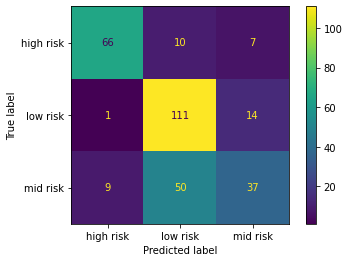

In [47]:
plot_confusion_matrix(svm, scaled_X_test, y_test)

In [48]:
svm_acc = accuracy_score(y_test, svm_pred)

In [49]:
scores.append(np.mean(cross_val_score(svm, X_train, y_train, cv=5)))
#scores = cross_val_score(svm, X_train, y_train, cv=5)

In [50]:
accuracy_list.append(svm_acc * 100)

In [51]:
######################################3

In [52]:
model_list = ["Random Forest", "KNearestNeighbors", "DecisionTree", "SVM"]

In [53]:
accuracy_list

[80.0, 76.39344262295083, 78.68852459016394, 70.16393442622952]

[80.0, 76.39344262295083, 78.68852459016394, 70.16393442622952]


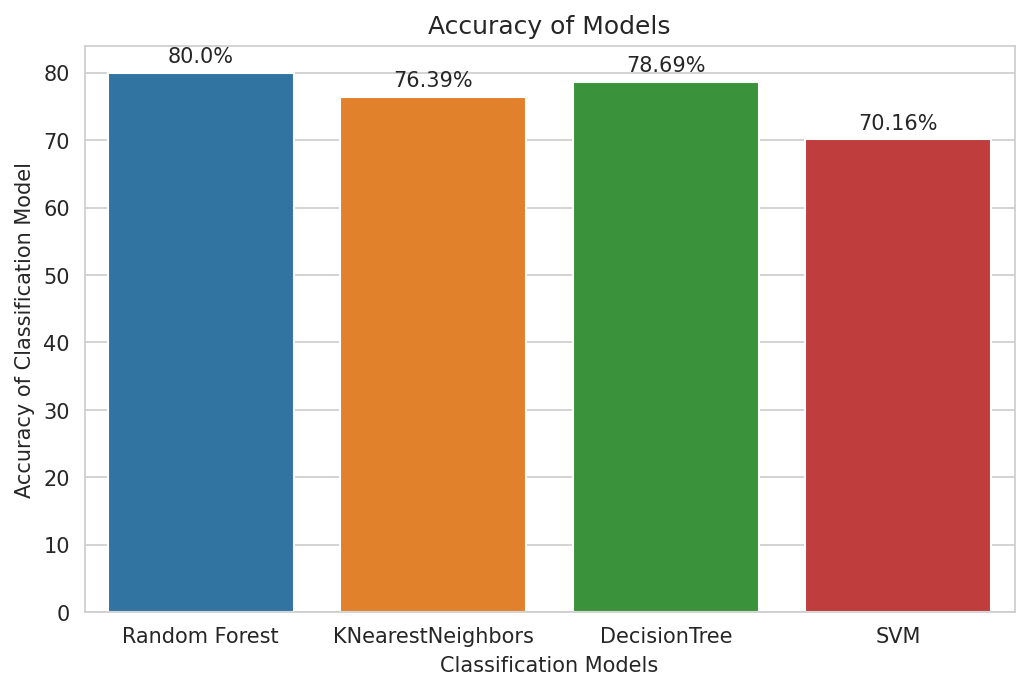

In [54]:
print(accuracy_list)
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(8,5), dpi=150)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
     width, height = i.get_width(), i.get_height()
     x, y = i.get_xy() 
     ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [55]:
scores

[0.787014284287284, 0.7517530716212166, 0.782788932174608, 0.5627809409649386]